In [161]:
import numpy as np
import pandas as pd

In [119]:
df=pd.read_csv("F:\\mldata\\train_ctrUa4K.csv")

In [120]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [121]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
import seaborn as sns

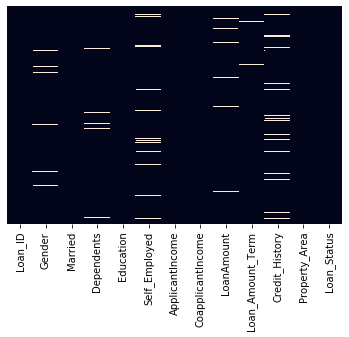

In [123]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [124]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [125]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [126]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [127]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [128]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [129]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [130]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [131]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [154]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [132]:
for features in df.columns: 
    print(features   ,  df[features].dtypes)

Loan_ID object
Gender object
Married object
Dependents object
Education object
Self_Employed object
ApplicantIncome int64
CoapplicantIncome float64
LoanAmount float64
Loan_Amount_Term float64
Credit_History float64
Property_Area object
Loan_Status object


In [133]:
type('LoanAmount')

str

In [135]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [136]:
df1=df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [137]:
df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1,inplace=True)

In [101]:
#df[df['Dependents']>2]

In [143]:
def is_int(x):
    try:
        int(x)
    except:
        return False
    return True

In [147]:
df["Loan_Amount_Term"]= df["Loan_Amount_Term"].astype(int) 

In [149]:
df['Loan_Amount_Term'].dtypes

dtype('int32')

In [152]:
df4 = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'], drop_first=True)

In [150]:
#df3 = pd.get_dummies(df,drop_first=True)


In [153]:
df4

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_36,Loan_Amount_Term_60,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1
3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
610,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
611,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
612,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1


In [115]:
#df2 = pd.get_dummies(df['Loan_Amount_Term'])

In [156]:
df5=pd.concat([df1,df4],axis='columns')

In [157]:
df5

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,...,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,4583,1508.0,128.000000,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,1,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
3,2583,2358.0,120.000000,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.000000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
610,4106,0.0,40.000000,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
611,8072,240.0,253.000000,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
612,7583,0.0,187.000000,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,1


In [158]:
y=df4['Loan_Status_Y']

In [159]:
X=df4.drop('Loan_Status_Y',axis='columns')

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_36,Loan_Amount_Term_60,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
610,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
611,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
612,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
